# Figures of the Manuscript
_Note_: This Notebook loads cached final results from .pkl files (see './cache/'). Complete results (tracked history and MlFlow artifacts) can be loaded from MlFlow
by executing ('make_plot_bar.py', etc.)

## Results
### Main Barplot Comparison Figure

In [1]:
import sys
sys.path.insert(0, '..')
from gpflow.kernels import SquaredExponential, Matern52
from data.train_test_split import PositionSplitter, RandomSplitter, BioSplitter, OptimizationSplitter
from protocol_factories import FractionalSplitterFactory
from algorithms import GPonRealSpace, KNN, RandomForest, UncertainRandomForest
from util.mlflow.constants import ONE_HOT, EVE, EVE_DENSITY, TRANSFORMER, ESM, NO_AUGMENT
from util.mlflow.constants import MSE, SPEARMAN_RHO
from make_plot_bar import plot_metric_comparison_bar
from make_plot_bar import plot_metric_mutation_comparison
from make_plot_bar import plot_metric_comparison_bar_splitting
from make_plot_bar import plot_mutation_comparison_matrix
from visualization.plot_metric_for_uncertainties import plot_uncertainty_eval

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-08-08 11:46:08.122841: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-08 11:46:08.122952: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [2]:
import matplotlib.pyplot as plt
plt.rcParams.update({
"text.usetex": False,
"font.family": "sans-serif"})

#### Definitions 
Data, representations, algorithms and protocols over which to conduct the comparison.:

In [3]:
DATASETS = ["1FQG", "UBQT", "TIMB", "MTH3", "BRCA"]
REPRESENTATIONS = [ONE_HOT, EVE, EVE_DENSITY, TRANSFORMER, ESM]
RANDOM_SEEDS = [11, 42, 123, 54, 2345, 987, 6538, 78543, 3465, 43245]
ALGORITHMS = [GPonRealSpace().get_name(), GPonRealSpace(kernel_factory= lambda: SquaredExponential()).get_name(), GPonRealSpace(kernel_factory= lambda: Matern52()).get_name(),
             RandomForest().get_name(), KNN().get_name()]
PROTOCOLS = [RandomSplitter("1FQG"), PositionSplitter("1FQG")]
METRICS = [MSE, SPEARMAN_RHO]

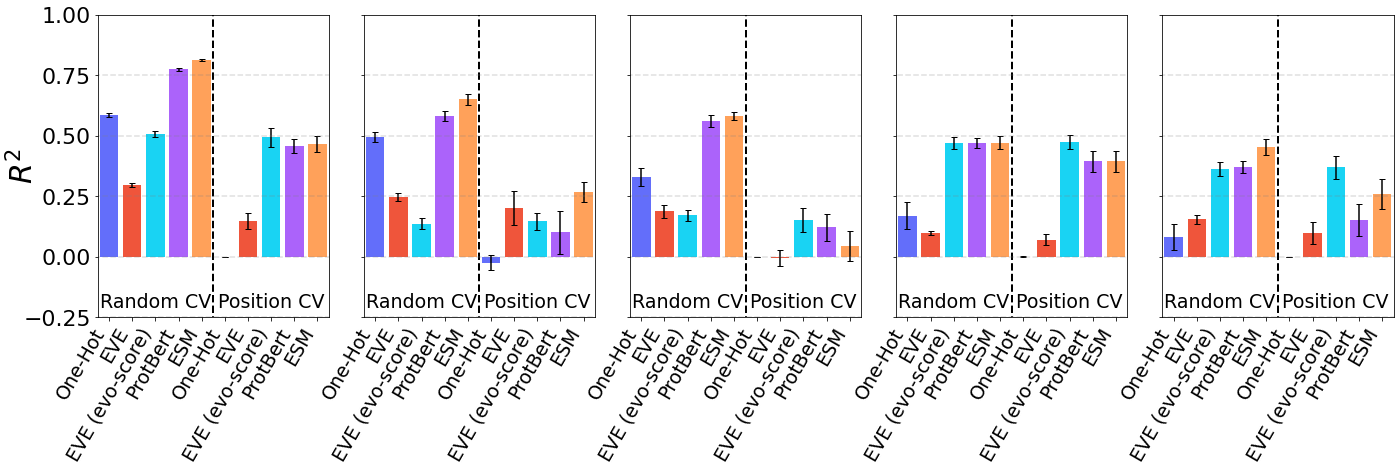

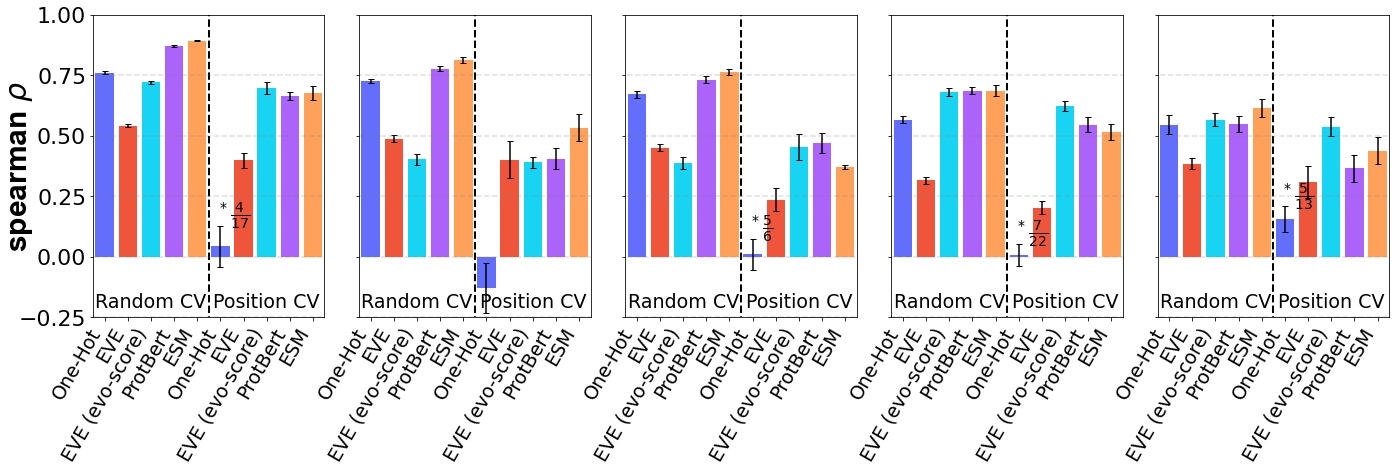

In [5]:
# Compare Embeddings (algorithm=Matern52 fixed):
plot_metric_comparison_bar(datasets=DATASETS,
                        reps=REPRESENTATIONS,
                        metrics=METRICS,
                        train_test_splitter=PROTOCOLS,
                        algos=[GPonRealSpace(kernel_factory=lambda: Matern52()).get_name()],
                        color_by="rep",
                        x_axis="rep",
                        cached_results=True,
                        savefig=False)

In [6]:
# Compare Regressors (representation=ESM fixed):
plot_metric_comparison_bar(
    datasets=DATASETS,
    reps=[ESM],
    metrics=METRICS, 
    train_test_splitter=[RandomSplitter("1FQG"), PositionSplitter("1FQG")],
    algos=ALGORITHMS,
    color_by="algo", x_axis="algo",
    cached_results=True,
    savefig=False
)

AttributeError: 'NoneType' object has no attribute 'name'

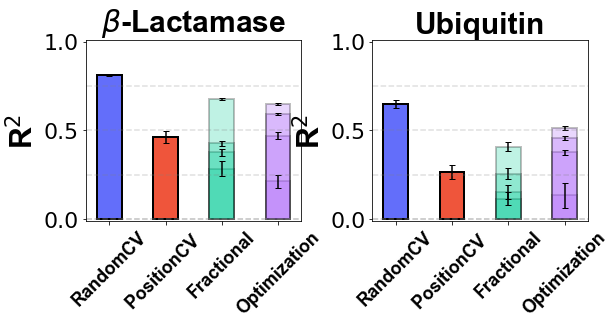

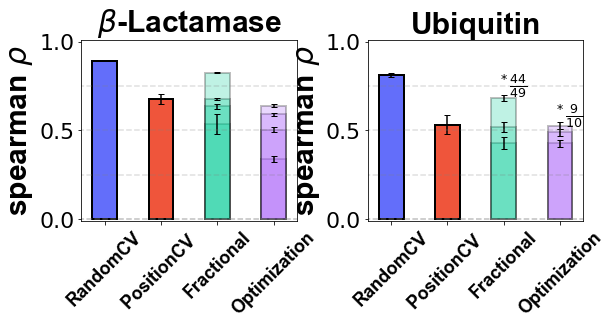

In [ ]:
# Compare splitters (representation and algorithm fixed):
fractional_splitters = FractionalSplitterFactory("1FQG")
plot_metric_comparison_bar_splitting(datasets=["1FQG", "UBQT"],
                        reps=[ESM],
                        metrics=METRICS,
                        train_test_splitter=[RandomSplitter("1FQG"), PositionSplitter("1FQG")] + fractional_splitters + [OptimizationSplitter("1FQG")],
                        algos=[GPonRealSpace(kernel_factory= lambda: Matern52()).get_name()],
                        color_by="task",
                        x_axis="task",
                        seeds=RANDOM_SEEDS,
                        cached_results=True,
                        savefig=False)

/Users/rcml/miniforge3/envs/env_tf/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


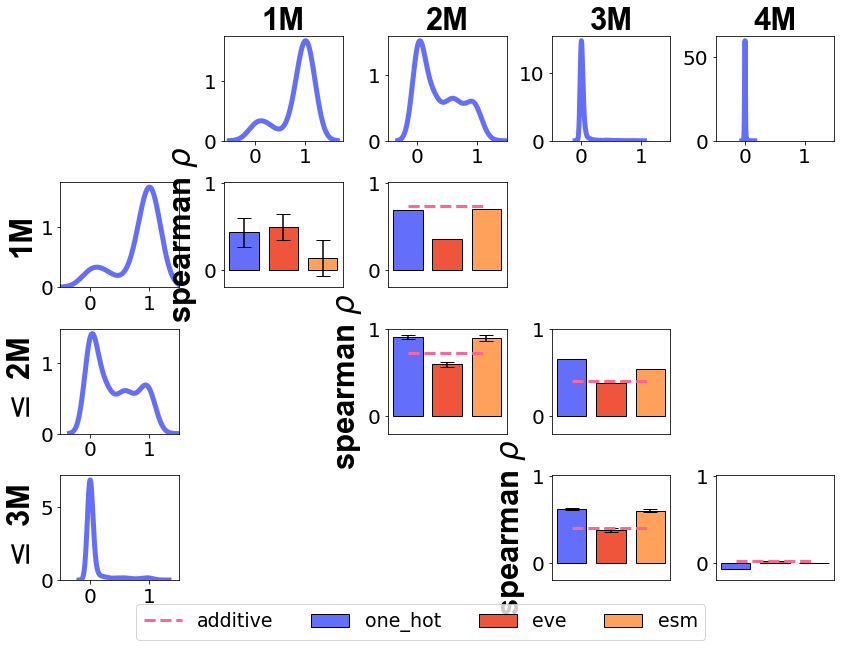

/Users/rcml/miniforge3/envs/env_tf/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


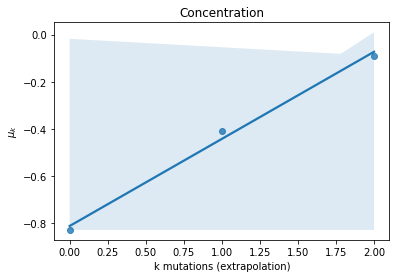

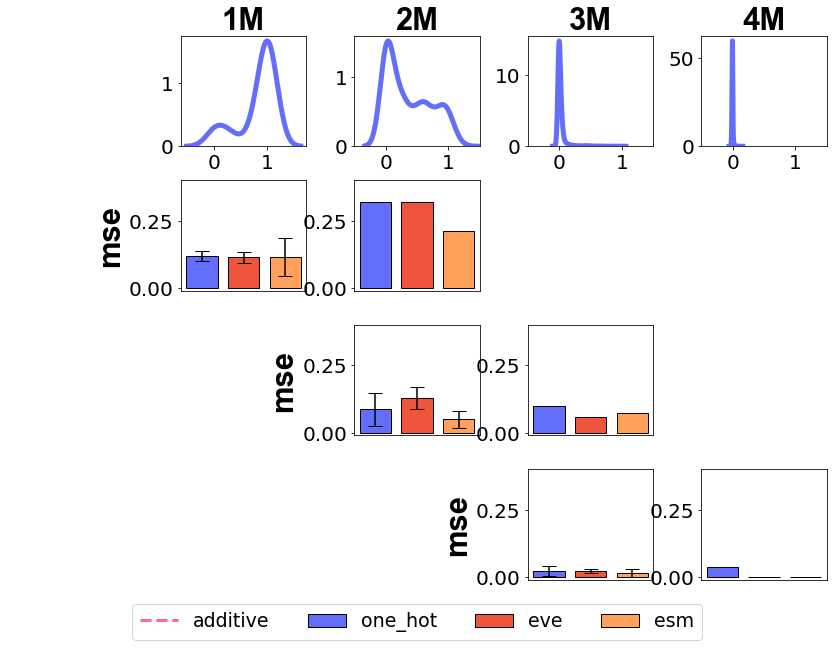

/Users/rcml/miniforge3/envs/env_tf/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


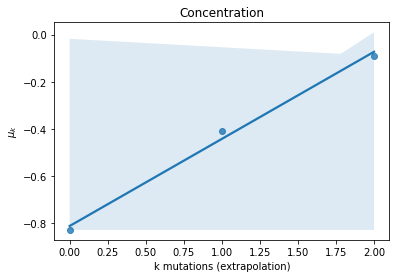

In [ ]:
plot_mutation_comparison_matrix(datasets=["TOXI"], 
                        algos=[GPonRealSpace(kernel_factory= lambda: Matern52()).get_name()], metrics=[SPEARMAN_RHO, "base_MSE"], 
                        reps=[ONE_HOT, EVE, ESM],
                        train_test_splitter=[BioSplitter("TOXI", 1, 1), BioSplitter("TOXI", 1, 2), BioSplitter("TOXI", 2, 2), BioSplitter("TOXI", 2, 3), BioSplitter("TOXI", 3, 3), BioSplitter("TOXI", 3, 4)],
                        dimension=None, dim_reduction=None,
                        cached_results=True,
                        savefig=False)

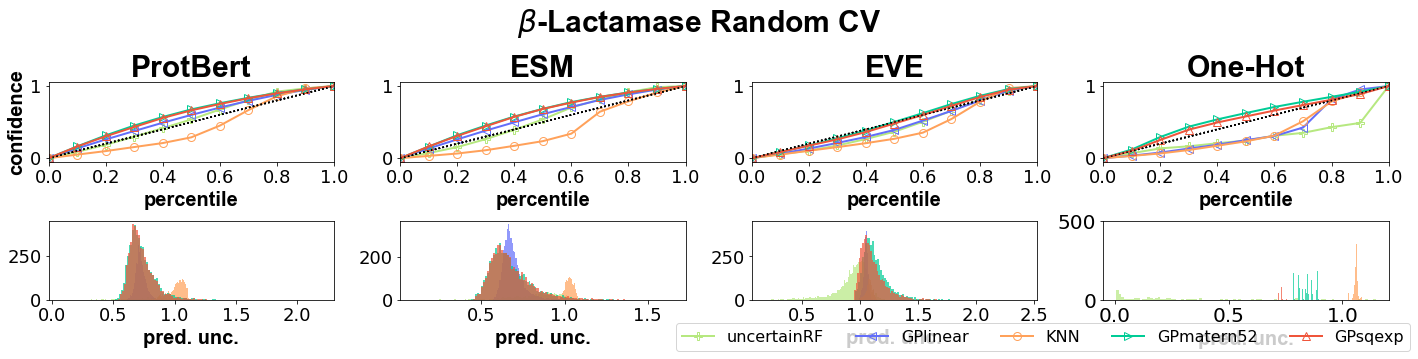

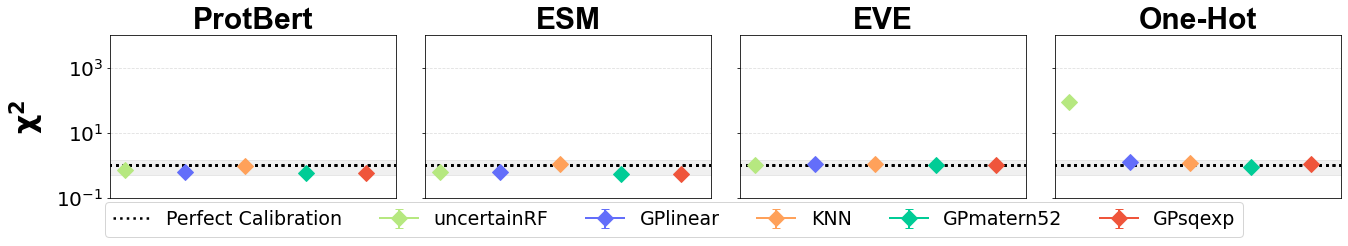

In [ ]:
# Assess Calibration on Random-Splitter
plot_uncertainty_eval(datasets=["1FQG"], 
                    reps=[TRANSFORMER, ESM, EVE, ONE_HOT],
                    algos=[UncertainRandomForest().get_name(), 
                        GPonRealSpace().get_name(),
                        KNN().get_name(),
                        GPonRealSpace(kernel_factory= lambda: Matern52()).get_name(), 
                        GPonRealSpace(kernel_factory= lambda: SquaredExponential()).get_name(),], 
                    train_test_splitter=RandomSplitter("1FQG"),
                    augmentations = [NO_AUGMENT], 
                    number_quantiles=10, 
                    optimize=True,
                    d=None, 
                    dim_reduction=None, 
                    cached_results=True,
                    savefig=False)

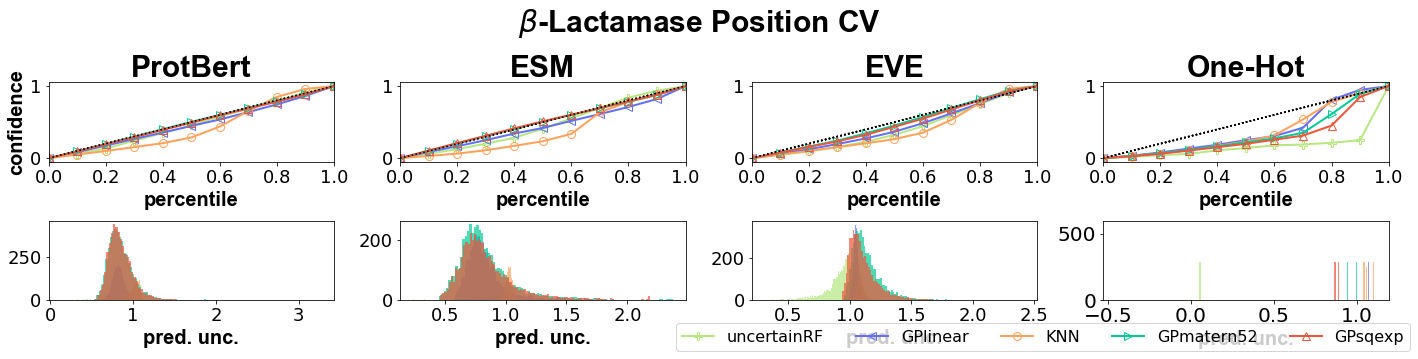

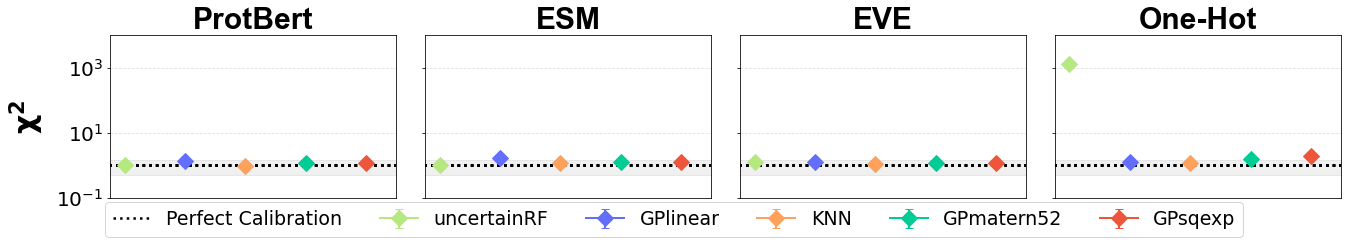

In [ ]:
# Assess Calibration on Random-Splitter
plot_uncertainty_eval(datasets=["1FQG"], 
                    reps=[TRANSFORMER, ESM, EVE, ONE_HOT],
                    algos=[UncertainRandomForest().get_name(), 
                        GPonRealSpace().get_name(),
                        KNN().get_name(),
                        GPonRealSpace(kernel_factory= lambda: Matern52()).get_name(), 
                        GPonRealSpace(kernel_factory= lambda: SquaredExponential()).get_name(),], 
                    train_test_splitter=PositionSplitter("1FQG"),
                    augmentations = [NO_AUGMENT], 
                    number_quantiles=10, 
                    optimize=True,
                    d=None, 
                    dim_reduction=None, 
                    cached_results=True,
                    savefig=False)